In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
labels_df = pd.read_csv('training_set_labels.csv')

In [3]:
labels_df.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
features_df = pd.read_csv('training_set_features.csv')

In [5]:
features_df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
df = pd.merge(labels_df, features_df, on='respondent_id')

In [7]:
df.head()

,respondent_id,xyz_vaccine,seasonal_vaccine,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [8]:
df

,respondent_id,xyz_vaccine,seasonal_vaccine,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,0,0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,0,1,2.0,2.0,0.0,1.0,1.0,1.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [9]:
missing_values = df.isnull().sum()
missing_values

respondent_id                      0
xyz_vaccine                        0
seasonal_vaccine                   0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

In [10]:
target_distribution = df[['xyz_vaccine','seasonal_vaccine']].value_counts(normalize=True)
target_distribution

xyz_vaccine  seasonal_vaccine
0            0                   0.497810
             1                   0.289737
1            1                   0.175871
             0                   0.036582
dtype: float64

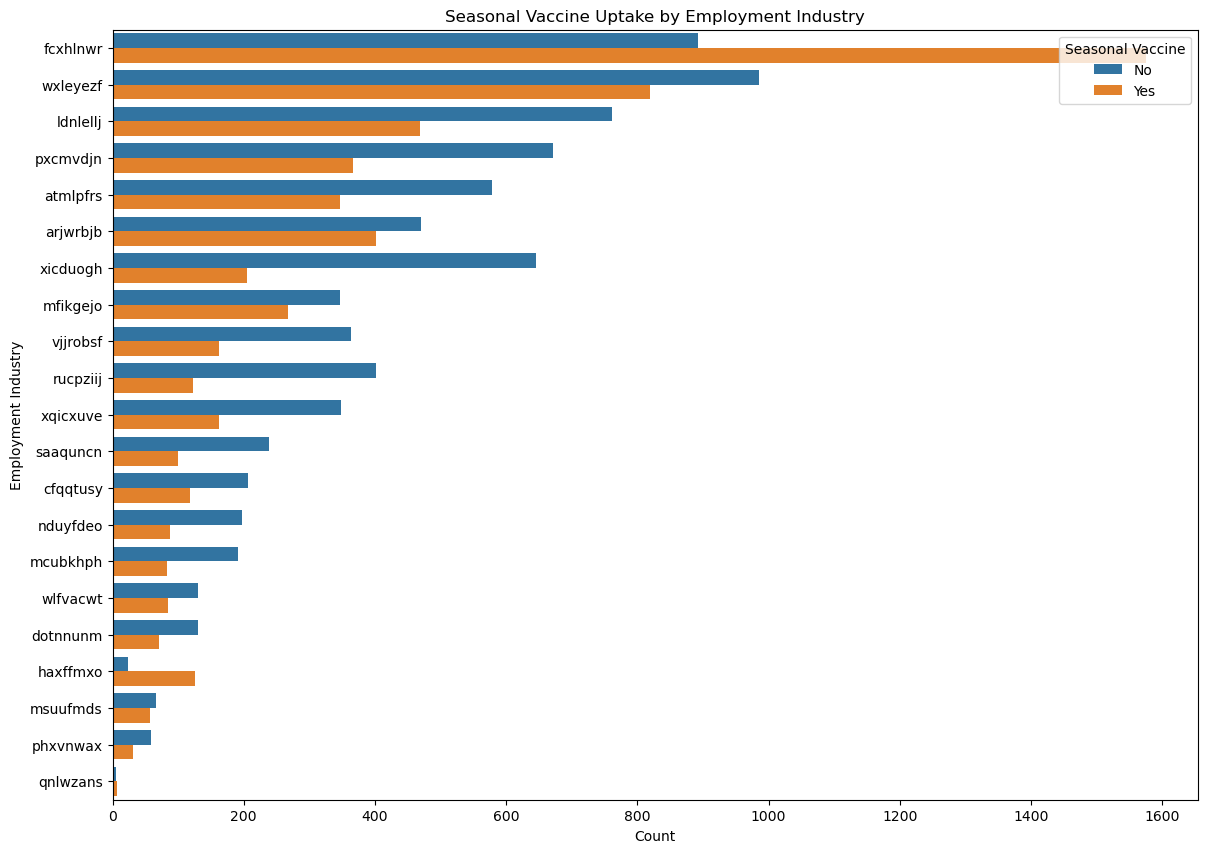

In [11]:
plt.figure(figsize=(14, 10))
sns.countplot(data=df, y='employment_industry', hue='seasonal_vaccine', order=df['employment_industry'].value_counts().index)
plt.title('Seasonal Vaccine Uptake by Employment Industry')
plt.xlabel('Count')
plt.ylabel('Employment Industry')
plt.legend(title='Seasonal Vaccine', loc='upper right', labels=['No', 'Yes'])
plt.show()

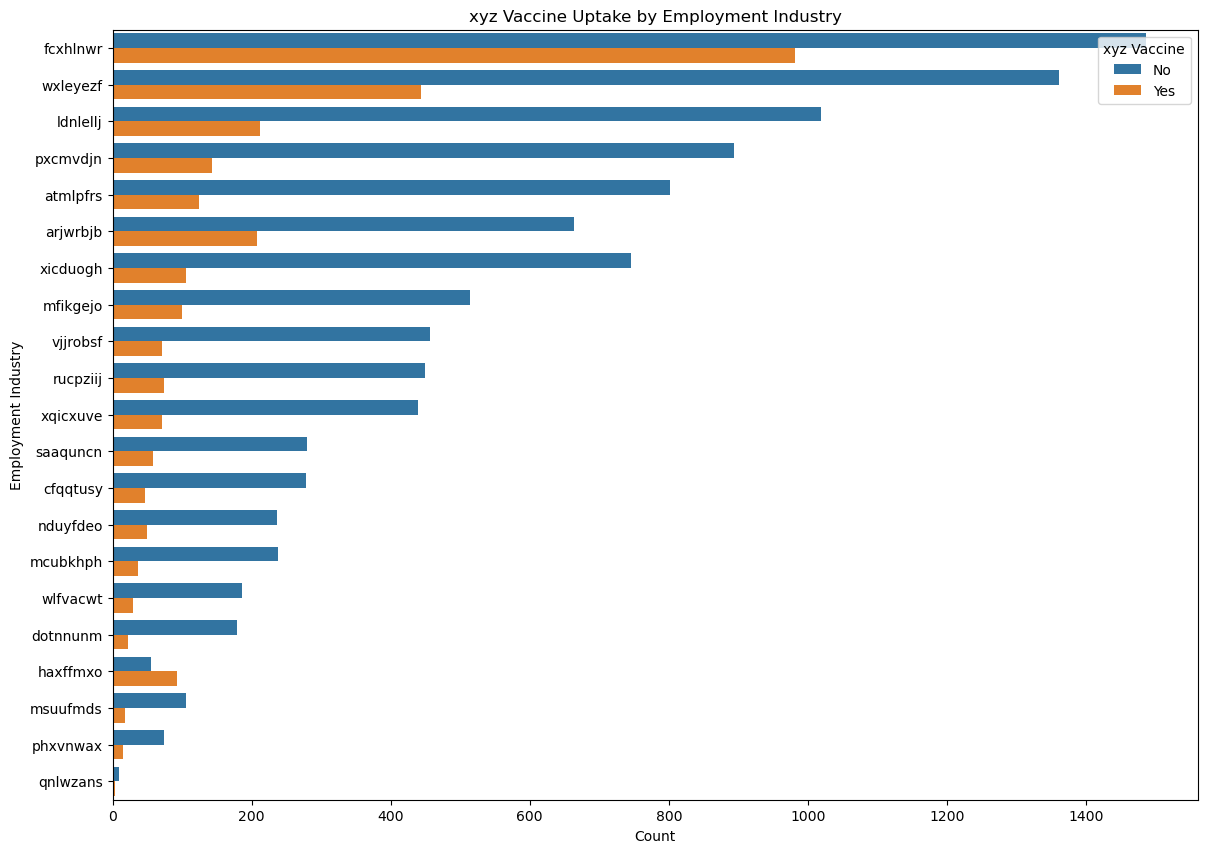

In [12]:
plt.figure(figsize=(14, 10))
sns.countplot(data=df, y='employment_industry', hue='xyz_vaccine', order=df['employment_industry'].value_counts().index)
plt.title('xyz Vaccine Uptake by Employment Industry')
plt.xlabel('Count')
plt.ylabel('Employment Industry')
plt.legend(title='xyz Vaccine', loc='upper right', labels=['No', 'Yes'])
plt.show()

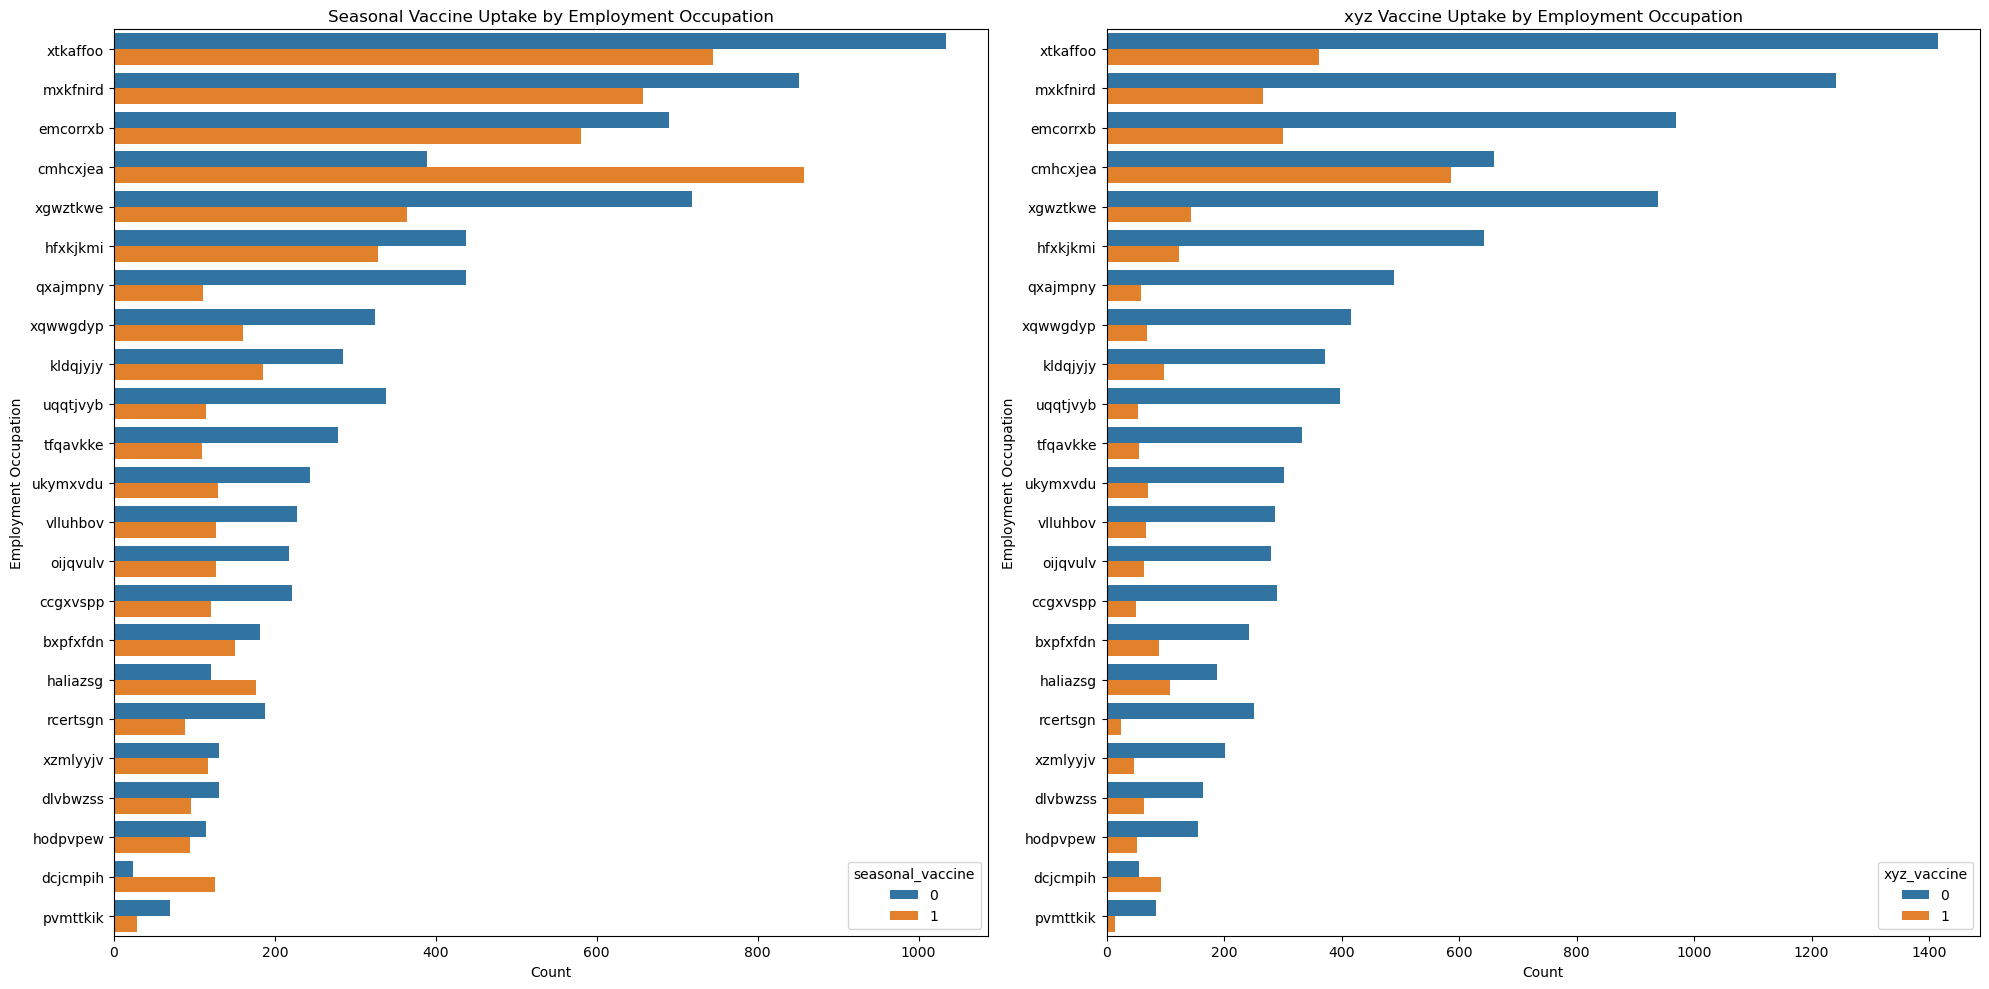

In [13]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot for Employment Occupation
sns.countplot(data=df, y='employment_occupation', hue='seasonal_vaccine', order=df['employment_occupation'].value_counts().index, ax=axes[0])
axes[0].set_title('Seasonal Vaccine Uptake by Employment Occupation')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Employment Occupation')

# Plot for Employment Occupation
sns.countplot(data=df, y='employment_occupation', hue='xyz_vaccine', order=df['employment_occupation'].value_counts().index, ax=axes[1])
axes[1].set_title('xyz Vaccine Uptake by Employment Occupation')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Employment Occupation')

# Adjust layout
plt.tight_layout()
plt.show()

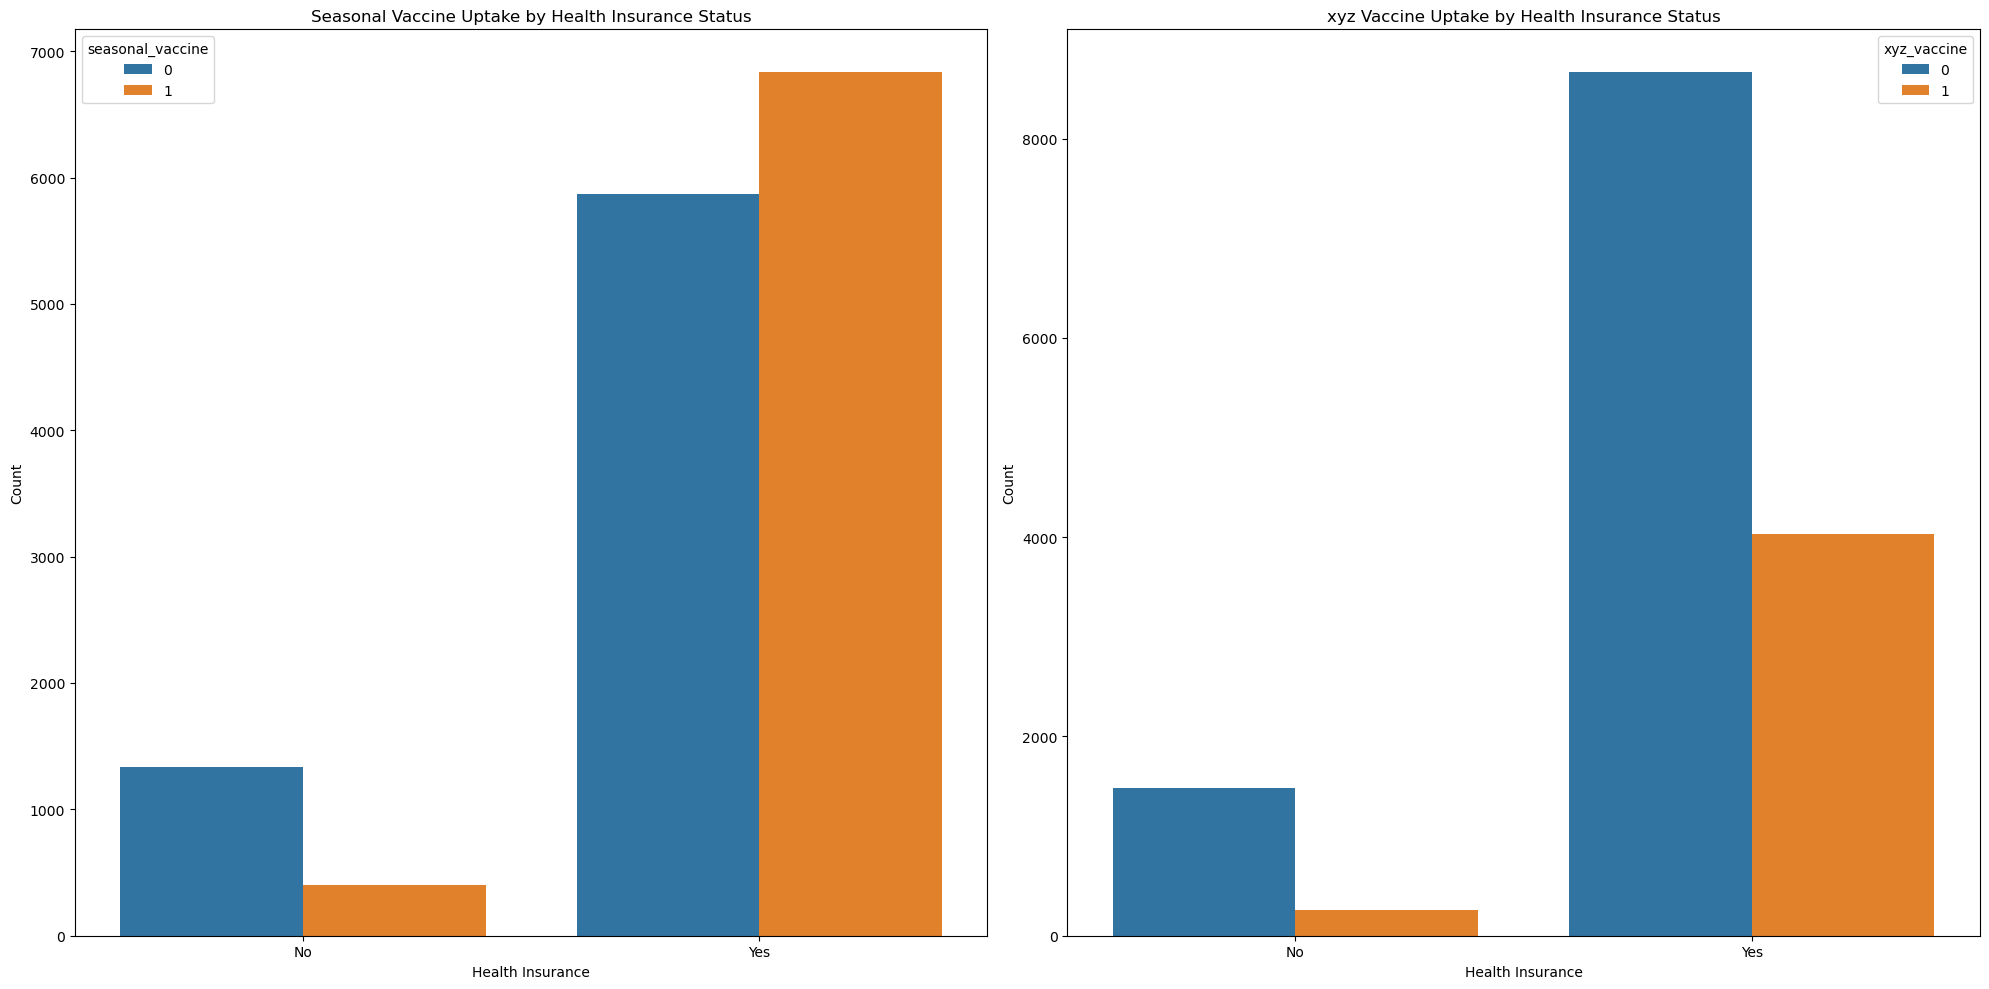

In [14]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot for Health Insurance
sns.countplot(data=df, x='health_insurance', hue='seasonal_vaccine', ax=axes[0])
axes[0].set_title('Seasonal Vaccine Uptake by Health Insurance Status')
axes[0].set_xlabel('Health Insurance')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])

# Plot for Health Insurance
sns.countplot(data=df, x='health_insurance', hue='xyz_vaccine', ax=axes[1])
axes[1].set_title('xyz Vaccine Uptake by Health Insurance Status')
axes[1].set_xlabel('Health Insurance')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
# Impute large missing values with 'Unknown'
df['employment_industry'].fillna('Unknown', inplace=True)
df['employment_occupation'].fillna('Unknown', inplace=True)

In [16]:
# Impute large missing values with a placeholder, e.g., -1
df['health_insurance'].fillna(-1, inplace=True)

In [17]:
# Separate features and target variables
X = df.drop(['xyz_vaccine', 'seasonal_vaccine'], axis=1)
y = df[['xyz_vaccine', 'seasonal_vaccine']]


In [18]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [19]:
# Impute missing values for numerical columns with the median
num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Impute missing values for categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

In [20]:
# One-Hot Encode categorical variables
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train the model
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [23]:
# Evaluate the model
y_pred = model.predict_proba(X_test)
y_pred = [pred[:, 1] for pred in y_pred]  # Get the probability for class 1

In [24]:
roc_auc_xyz = roc_auc_score(y_test['xyz_vaccine'], y_pred[0])
roc_auc_seasonal = roc_auc_score(y_test['seasonal_vaccine'], y_pred[1])
mean_roc_auc = (roc_auc_xyz + roc_auc_seasonal) / 2

In [25]:
print(f'ROC AUC for xyz_vaccine: {roc_auc_xyz}')
print(f'ROC AUC for seasonal_vaccine: {roc_auc_seasonal}')
print(f'Mean ROC AUC: {mean_roc_auc}')


ROC AUC for xyz_vaccine: 0.8580422349965122
ROC AUC for seasonal_vaccine: 0.8542849042195555
Mean ROC AUC: 0.8561635696080339


In [26]:
# Load the test data
test_features_df = pd.read_csv('test_set_features.csv')


In [27]:
# Fill specific columns with predefined values
test_features_df['employment_industry'].fillna('Unknown', inplace=True)
test_features_df['employment_occupation'].fillna('Unknown', inplace=True)
test_features_df['health_insurance'].fillna(-1, inplace=True)



In [28]:
# Impute missing values for numerical columns with the median
test_features_df[num_cols] = num_imputer.transform(test_features_df[num_cols])
test_features_df[cat_cols] = cat_imputer.transform(test_features_df[cat_cols])


In [29]:
# One-Hot Encode categorical variables in the test data
test_encoded_df = pd.get_dummies(test_features_df, columns=cat_cols, drop_first=True)


In [30]:
# Ensure that the test data has the same columns as the training data
missing_cols = set(X.columns) - set(test_encoded_df.columns)
for col in missing_cols:
    test_encoded_df[col] = 0
test_encoded_df = test_encoded_df[X.columns]

In [31]:
# Make predictions on the test data
test_pred = model.predict_proba(test_encoded_df)
test_pred = [pred[:, 1] for pred in test_pred]  # Get the probability for class 1

In [32]:
# Prepare the submission file
submission_df = pd.DataFrame({
    'respondent_id': test_features_df['respondent_id'],
    'xyz_vaccine': test_pred[0],
    'seasonal_vaccine': test_pred[1]
})

In [33]:
# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)